In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_diabetes

data = load_diabetes()

In [3]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [4]:
x = data.data
y = data.target

In [5]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [6]:
from sklearn.linear_model import LinearRegression

l = LinearRegression()

In [7]:
l.fit(x_train,y_train)

LinearRegression()

In [8]:
print(x_train,y_train)

[[ 0.07076875  0.05068012  0.01211685 ...  0.03430886  0.02736405
  -0.0010777 ]
 [-0.00914709  0.05068012 -0.01806189 ...  0.07120998  0.00027248
   0.01963284]
 [ 0.00538306 -0.04464164  0.04984027 ... -0.00259226  0.01703607
  -0.01350402]
 ...
 [ 0.03081083 -0.04464164 -0.02021751 ... -0.03949338 -0.01090325
  -0.0010777 ]
 [-0.01277963 -0.04464164 -0.02345095 ... -0.00259226 -0.03845972
  -0.03835666]
 [-0.09269548 -0.04464164  0.02828403 ... -0.03949338 -0.00514219
  -0.0010777 ]] [144. 150. 280. 125.  59.  65. 281. 277. 167.  90.  72. 178.  88. 270.
 101. 197.  97.  53.  71. 262.  52. 102. 166. 189. 173. 220. 206.  97.
  60.  61. 242. 121. 128. 104. 265. 132. 283. 174. 129. 257. 137.  63.
  93. 232. 208. 261. 179. 258. 262.  51. 237.  71. 139. 268.  69. 317.
 249. 154. 192. 116.  81. 122. 259. 191. 292.  55. 107. 210.  91. 253.
  85. 252.  59.  78. 200.  78. 245. 175.  42. 127.  53.  94. 104. 199.
 265. 281. 248. 257. 215. 303. 170.  59. 277. 209. 138. 198. 124.  96.
 288. 225. 

In [9]:
print(l.coef_)

[  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]


In [10]:
print(l.intercept_)

151.34560453985995


In [11]:
y_pred = l.predict(x_test)

In [12]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print("R2 score",r2_score(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.45260276297191926
RMSE 53.85344583676594


In [13]:
from sklearn.linear_model import Ridge
r = Ridge(alpha=10000)

In [14]:
r.fit(x_train,y_train)

Ridge(alpha=10000)

In [15]:
print(r.coef_)

[ 0.02500977  0.00092571  0.07854133  0.05922102  0.02618788  0.02026315
 -0.04962441  0.05580268  0.07254974  0.05187789]


In [16]:
print(r.intercept_)

153.73607597657485


In [19]:
y_pred1=r.predict(x_test)

In [20]:
print("R2 score",r2_score(y_test,y_pred1))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred1)))

R2 score -0.011710971590750185
RMSE 73.21337482405086


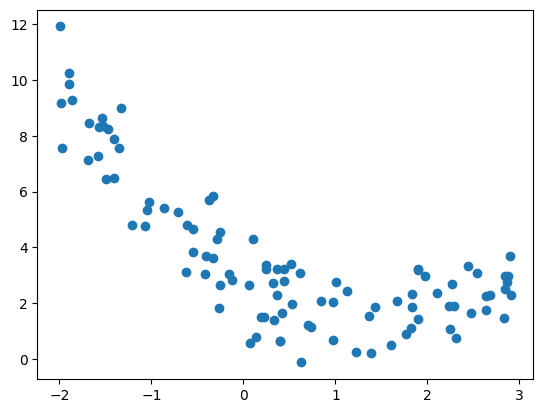

In [21]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

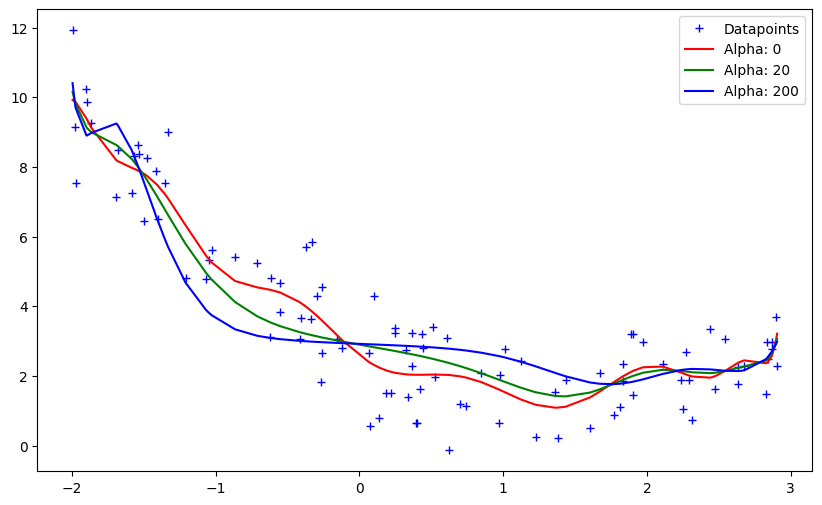

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()